In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string

# VEST OH 2016
---

## VEST Documentation

### Election Results

#### Sources
Election results from the Ohio Secretary of State (https://www.sos.state.oh.us/elections/election-results-and-data/). 

#### Processing Part 1
The following counties include adjustments to account for corporate annexations that are not specified below by precinct: Adams, Allen, Athens, Auglaize, Brown, Butler, Defiance, Franklin, Fulton, Geauga, Guernsey, Holmes, Licking, Lorain, Madison, Marion, Miami, Ottawa, Pickaway, Sandusky, Shelby, Stark, Tuscarawas, Van Wert, Warren, Wayne, Wyandot.

#### Processing Part 2 (unclear whether this is for election results, shapefiles, or both)
The following additional revisions were made to match the 2016 precinct boundaries:

- **Adams:** Split Liberty N/S, Peebles E/W
- **Ashland:** Split Ashland City 1-B/C, 2-B/C, 4-C/D, Clear Creek 1/2, Hanover/Loundonville 2, Vermilion 2/3
- **Athens:** Adjust Athens 4-4/4-5, Nelsonville 1/2/3/4
- **Brown:** Adjust Perry Twp South/Villages
- **Butler:** Adjust Hamilton 22/24, Oxford 6/11, Trenton 5/7, West Chester 28/39
- **Champaign:** Adjust Union N/S
- **Clark:** Align New Carlisle, Springfield precincts with county maps
- **Clermont:** Reverse unincorporation of Amelia and Newtonsville
- **Clinton:** Merge Wilmington 3-B/C
- **Columbiana:** Split E Liverpool 4-A/B, St Clair Glenmoor/SW
- **Coshocton:** Split Coshocton 3-B/C, 4-B/C
- **Crawford:** Split Holmes/Texas, Sandusky/Whetstone North; Move eastern Polk Twp from Galion 1B to western Polk Twp
- **Cuyahoga:** Adjust Olmsted Twp D/F/H; Realign Westlake wards
- **Defiance:** Merge N/S Richland; Split Tiffin A/B
- **Delaware:** Merge Berkshire B/D/E, Berlin B/F, Concord F/J, Columbus D/G, Delaware 3-F/H, 4-E/G, Genoa H/T, Liberty N into B/C, Orange D/T, G/U, Powell K into G/I, Westerville A/I; Adjust Berkshire A/C/B, Berlin A/C, Columbus A/D, B/D, C/E, Delaware 3-A/2-D, 2-D/Twp A, 3-C/3-E/Twp B, Genoa N/Q, Liberty A/Powell J, Liberty G/K, Orange B/E, H/O, Powell E/F
- **Fairfield:** Realign precincts in Columbus City, Lancaster Ward 1, Ward 2, Ward 6; Merge Pickerington K/O, Pickerington N into F/L; Adjust Bloom A/B, Lancaster 4-B/C, Pickerington J/K, Violet B/C, I/J
- **Fulton:** Split Amboy/Metamora, Fayette/Gorham, Lyons/Royalton, Swancreek West 1/2, Swanton 1/2, 3/4, York N/S
- **Franklin:** Merge Dub 1-I into Dub 1-A/F, Cols 05-B/D, 08-A/H, 08-B/G, 12-D/E, 14-D/G, 16-C/F, 30-A/E, 33-C/J, 33-F/I, 41-D/H/I, 42-A/E, 43-A/E, 44-E/H, 45-C/N, 45-H/M, 45-K/O, 46-E/L, 46-G/M, 50-D/E, 52-C/H, 52-F/G, 57-F/G, 58-A/K, 59-C/F, 64-C/G, 64-D/H, 68-A/D, 69-C/N, 73-G/L, 73-H/K, 73-J/M, 74-E/H, 75-D/H, 75-E/I, 78-C/I, 79-D/E, 82-F/N, 82-G/M, 82-I/O, 83-B/H, 83-C/J, 83-F/I, 84-D/H, 85-D/E, 86-F/I, 86-G/J, Grove City 1-E/G, 2-E/G, Groveport A/E, Hill 1-D/G, 2-C/F, 4-D/E, Jefferson D/I, E/J, F/H, New Albany F/G, Reyns 2-A/G, 4-B/G, Westerville 3-A/E, Worth 3-A/D, 3-B/C
- **Gallia:** Merge Addison Pct/Twp
- **Greene:** Adjust Bath 277/Fairborn 226/Xenia 351
- **Hamilton:** Merge Blue Ash 4-A/B, Norwood 1-A/C, Cincinnati 6-E into 6-A/B, 11-D into 11-A/B/C, 12-A/D, 12-C/E, 13-B/H; Adjust Blue Ash 1-B/2-A/3-B/4-A, Cincinnati 12-B/C, 23-A/D, 23-I/P, 25-F/K, Cleves A/Whitewater A, Colerain BB/F/H, Delhi A/B, Loveland D/Symmes C/K, Miami B/D/G, Whitewater A/C; Realign Cincinnati/Green B
- **Hocking:** Split Falls 1/4, 3/5, Falls 3/West Logan, Hide Away Hills/Marion 1, Laurelville/Perry 1
- **Knox:** Merge Brinkhaven/Union, Gambier A/C; Adjust Clinton A/Mount Vernon 1-B, Clinton B/Mount Vernon 2-A
- **Lake:** Merge Concord B/O, Mentor City 2G/2I, Painesville City 4A/4D, Painesville Twp L into A/K; Adjust Concord A/I, Painesville City 2-A/B, Painesville Twp C/E, Willoughby Hills CC/DD
- **Logan:** Split Second Ward A/C, B/D
- **Lorain:** Merge Avon Lake City 4-A/D, N. Ridgeville 3-A/F/H, N. Ridgeville 1-E into 1-B/D, 3-G into 3-C/D; Adjust Avon Lake City 2-B/C, 4-A/B/C, N. Ridgeville 3-A/B
- **Lucas:** Realign wards in Jerusalem, Maumee, Monclova, Oregon, Ottawa Hills, Spencer, Springfield, Sylvania City, Sylvania Twp, Washington
- **Madison:** Split Monroe/Pike, Paint/Midway-Range/S Solon-Stokes
- **Medina:** Merge Brunswick City 1-F into 1-C/D, York Twp C into A/B, Montville Twp H into A/B, Montville Twp I into A/C/E; Adjust Brunswick City 1-A/B, Wadsworth City 1-D/Sharon D, Wadsworth City 2-D/Twp C
- **Pickaway:** Merge Commercial Point East/West; Add Circleville 1-D; Align Circleville wards with city map
- **Portage:** Split Brady Lake Vlg/Franklin D
- **Putnam:** Merge Glandorf/Ottawa Twp West
- **Richland:** Split Mansfield Ward 6 Prec B/C, Worthington B/C; Adjust Ontario 3/4
- **Stark:** Split Alliance 3-A/C, Canton 2-D/F, 2-E/G, 4-D/E, Massillon 4-A/B, 5-B/D, 7-B/D, 7-H/I, Lake 10/12, Paris A/B, Plain 7/13, Plain 22/23, Sugarcreek 1/D; Merge Jackson 33 into 17/23/30, Lake B into Lake A/15, Lawrence 6 into Lawrence 1/3; Adjust Coventry D/G, Hudson 1-B/3-C, Jackson 6/22, N. Canton 2-A/B, Perry 4/16, Plain 8/29/30
- **Summit:** Adjust Coventry D/G, Fairlawn 2-A/4-A, Hudson 1-B/3-C, Springfield F/J; Realign Twinsburg wards
- **Union:** Merge Jerome 3/6, Marysville 1/2, Marysville 4 into 3/11, Marysville 15 into 4/9
- **Warren:** Split Springboro City 4-B/D, Deerfield W from Deerfield AA/X, Mason City U from Mason City N/T; Merge Clearcreek B/N, Hamilton A/U, D/T, Turtlecreek L into Turtlecreek A/F, Mason City Z into Mason City F/Deerfield E/Union A; Adjust Carlisle 2-A/3-A, South Lebanon A/B, C/D, Springboro 1-B/C, Turtlecreek F/K
- **Wood:** Replace Bloom, Milton, Montgomery, Perry, Portage precincts with 2019 VTDs
- **Wyandot:** Split Sycamore Twp/Village

### Shapefiles

#### Sources
Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release. Note that some VTDs were relabeled to match precinct names and/or precinct codes in the November 2016 general election returns.

# Election Result Processing

## Get VEST file and FIPS dictionary ready

### Load in VEST file

In [2]:
vest_oh_16 = gp.read_file("./raw-from-source/VEST/oh_2016/oh_2016.shp")

In [3]:
vest_oh_16.crs

{'init': 'epsg:4269'}

<AxesSubplot:>

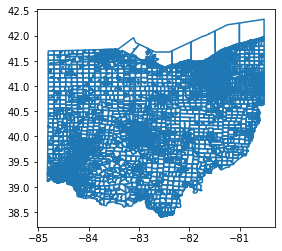

In [4]:
vest_oh_16.boundary.plot()

In [5]:
vest_oh_16.columns

Index(['STATEFP16', 'COUNTYFP16', 'VTDST16', 'PRECINCT16', 'GEOID16', 'NAME16',
       'G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH', 'G16PREGSTE', 'G16PREIDUN',
       'G16USSRPOR', 'G16USSDSTR', 'G16USSGDEM', 'G16USSICON', 'G16USSIRUP',
       'geometry'],
      dtype='object')

### Create a FIPs dictionary for OH

In [6]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Ohio"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
oh_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Load and Clean Election Results

### Load Election Results

Cleaned the `precincts.xlsx` file by hand, and created `sos_precinct_results_clean.csv`. No modifications were made to the election results. The President and U.S. Senate results were merged into one sheet tab, and election columns were renamed to match VEST's. 

In [7]:
#Load in clean SOS file
elections_2016 = pd.read_csv("./raw-from-source/SOS/sos_precinct_results_clean.csv")

In [8]:
elections_2016.shape

(8887, 13)

In [9]:
elections_2016.head()

,County Name,Precinct Name,Precinct Code,G16PREDCLI,G16PREIDUN,G16PRELJOH,G16PREGSTE,G16PRERTRU,G16USSICON,G16USSGDEM,G16USSRPOR,G16USSIRUP,G16USSDSTR
0,Adams,BRATTON TOWNSHIP,AAA,96,4,12,4,532,6,6,532,10,80
1,Adams,BRUSH CREEK TOWNSHIP,AAB,95,5,9,0,390,16,6,358,6,93
2,Adams,LOCUST GROVE,AAD,94,2,5,4,408,12,5,393,9,85
3,Adams,GREEN TOWNSHIP,AAE,76,2,2,1,176,2,4,169,1,69
4,Adams,JEFFERSON TOWNSHIP,AAG,73,1,8,2,258,5,9,239,2,86


In [10]:
#Map to the correct FIP
elections_2016["county"]=elections_2016["County Name"].map(oh_fips_dict).fillna(elections_2016["County Name"])

#Print out the FIPS to make sure they all are in the correct format
elections_2016["county"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '163', '165', '167', '169', '171', '173', '175'], dtype=object)

## Compare Election Results Totals

### Compare Total Votes

In [11]:
races = [x for x in vest_oh_16.columns if 'G16' in x]
races

['G16PRERTRU',
 'G16PREDCLI',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREIDUN',
 'G16USSRPOR',
 'G16USSDSTR',
 'G16USSGDEM',
 'G16USSICON',
 'G16USSIRUP']

In [12]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_oh_16[i])
    sum_var_2 += np.sum(elections_2016[i])
print(sum_var_1)
print(sum_var_2)

10854226
10854226


### Compare Race Totals

In [13]:
for race in races:
    diff_val = sum(vest_oh_16[race])-sum(elections_2016[race])
    if diff_val != 0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL")

G16PRERTRU: EQUAL
G16PREDCLI: EQUAL
G16PRELJOH: EQUAL
G16PREGSTE: EQUAL
G16PREIDUN: EQUAL
G16USSRPOR: EQUAL
G16USSDSTR: EQUAL
G16USSGDEM: EQUAL
G16USSICON: EQUAL
G16USSIRUP: EQUAL


### County Totals

In [14]:
diff_counties=[]
for i in races:
    diff = elections_2016.groupby(["county"]).sum()[i]-vest_oh_16.groupby(["COUNTYFP16"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False), 'NOT EQUAL')
    else:
        print(race + ' county totals: EQUAL')

G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL
G16USSIRUP county totals: EQUAL


# Precinct Shapefile

## Load in the shapefiles

### 2020 TIGER/Line

> Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program final release

Link to the 2020 TIGER/Line files for Ohio, where we can download the VTD file: 
https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/39_OHIO/39/

In [15]:
tiger_vtd = gp.read_file('./raw-from-source/Census/tl_2020_39_vtd20/tl_2020_39_vtd20.shp')

In [16]:
tiger_vtd.head(1)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,39,009,005ACR,39009005ACR,A,ATHENS 2-5,ATHENS 2-5,00,G5240,N,128384,1292,+39.3235059,-082.0932670,"POLYGON ((-82.09632 39.32211, -82.09627 39.322..."


In [17]:
tiger_vtd.shape

(8941, 15)

<AxesSubplot:>

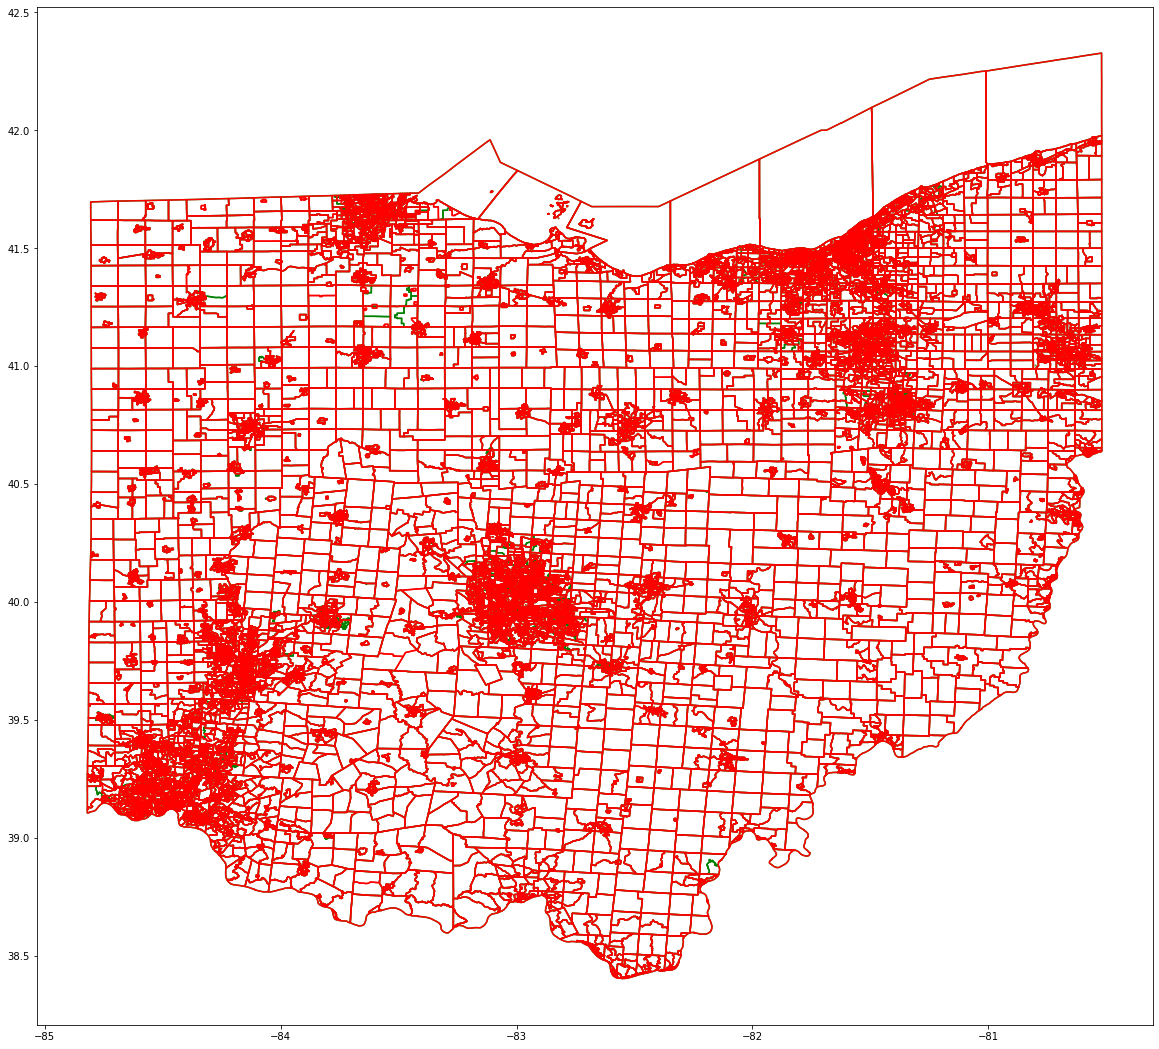

In [18]:
#Plot what they look like on top of one another, looks similar to what VEST has
ax = tiger_vtd.boundary.plot(figsize=(20,20),color="green")
vest_oh_16.boundary.plot(figsize=(20,20),ax=ax,color="red")

With a cursory look, this looks correct. 

In [19]:
merge_shps = pd.merge(tiger_vtd,vest_oh_16,how="outer",left_on="VTDST20",right_on="VTDST16",indicator=True)

In [20]:
both = merge_shps[merge_shps["_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_oh_16.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_oh_16.crs)
source_geoms = source_geoms.to_crs(epsg=3857)
vest_geoms = vest_geoms.to_crs(epsg=3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     8027
False     846
dtype: int64
